# LOGISTIC REGRESSION

In [69]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# 1. Data Exploration:

In [70]:
#a. Load the dataset and perform exploratory data analysis (EDA).
train_data = pd.read_csv('Titanic_train.csv')
test_data = pd.read_csv('Titanic_test.csv')

In [71]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [73]:
#b. Examine the features, their types, and summary statistics.
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [74]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [75]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [76]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [77]:
a = train_data.duplicated().sum()
b = test_data.duplicated().sum()
print(f"Duplicates in train data:{a}")
print(f"Duplicates in test data:{b}")

Duplicates in train data:0
Duplicates in test data:0


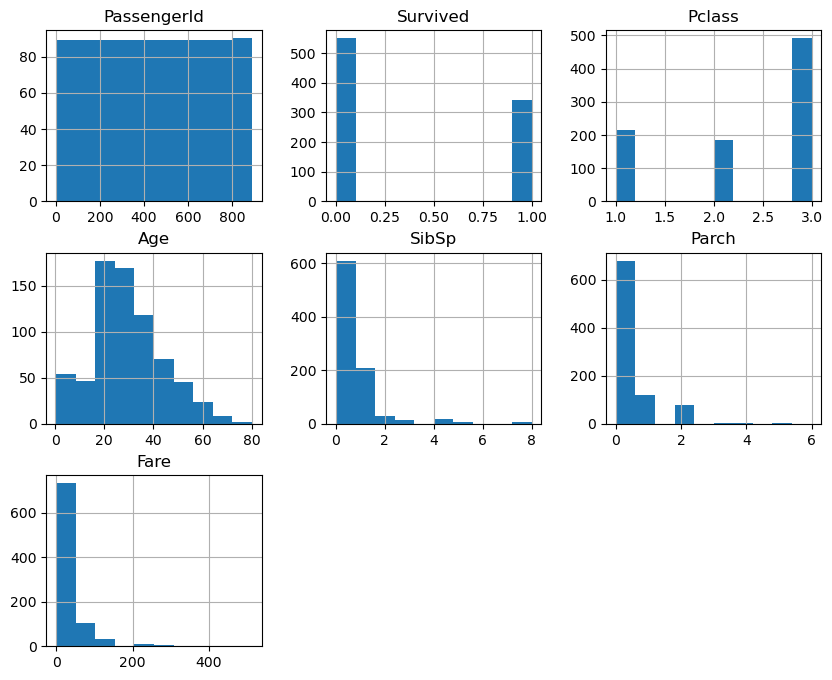

In [78]:
#c. Create visualizations 
# Histograms for numerical columns
train_data.hist(figsize=(10, 8))
plt.show()

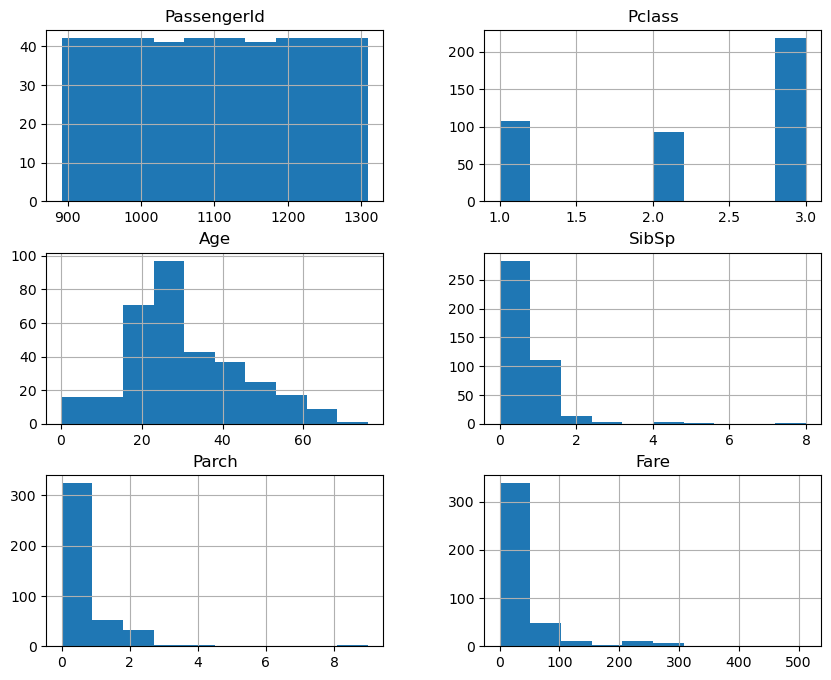

In [79]:
test_data.hist(figsize=(10, 8))
plt.show()

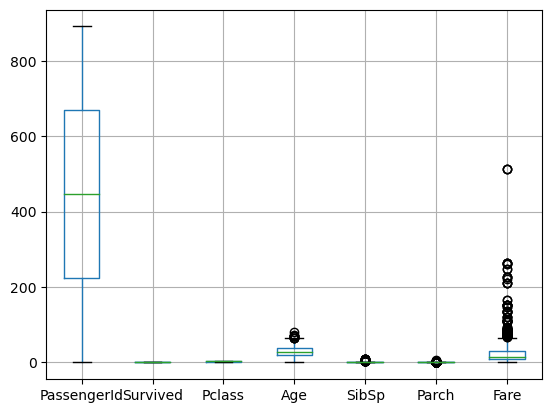

In [80]:
# Boxplot to analyze outliers and relationships
train_data.boxplot()
plt.show() 

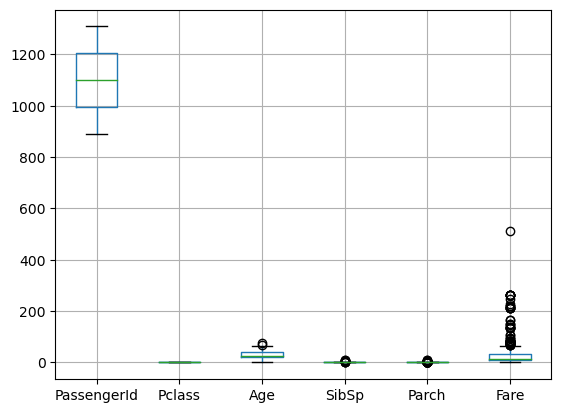

In [81]:
test_data.boxplot()
plt.show() 

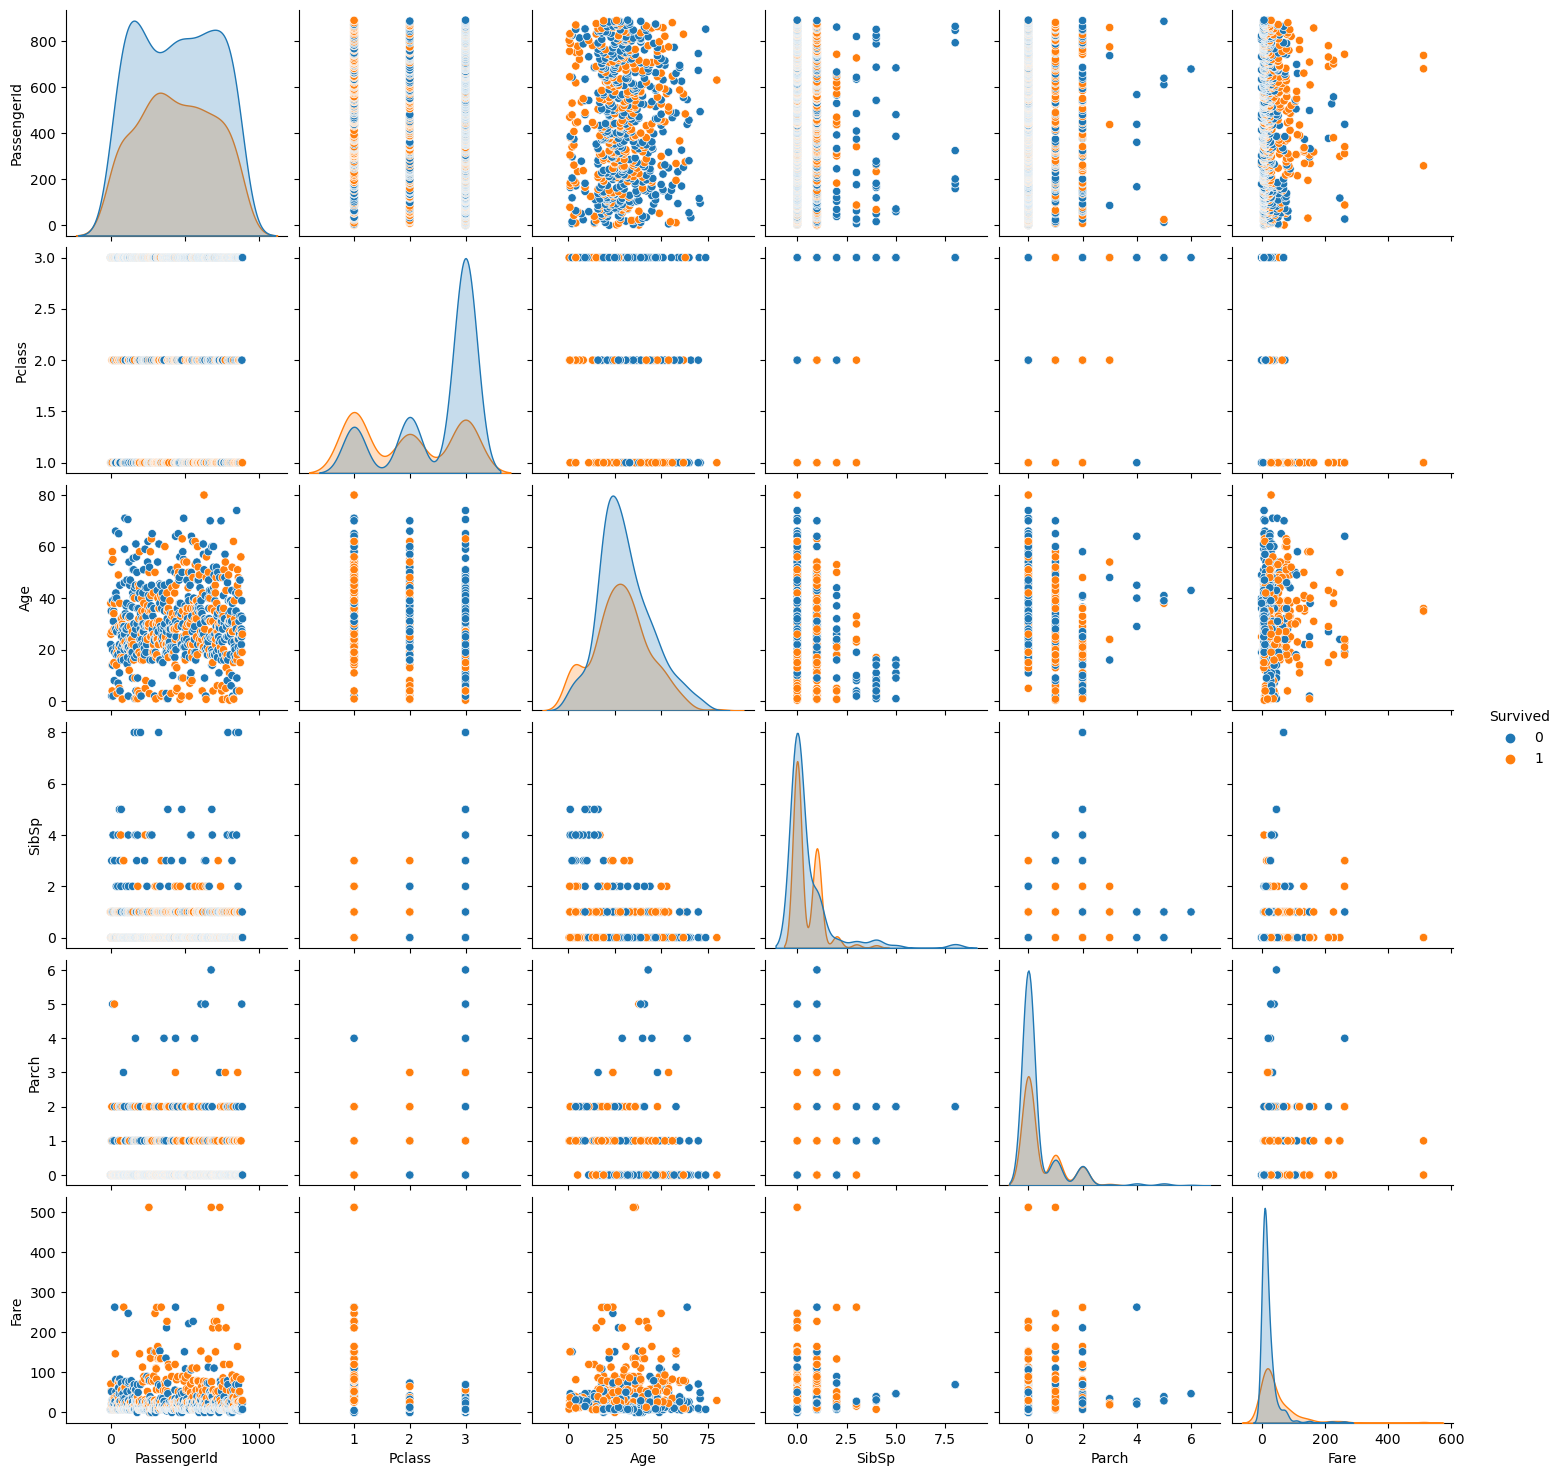

In [82]:
# Pairplot for numerical feature relationships
sns.pairplot(train_data[['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']], hue='Survived')
plt.show()

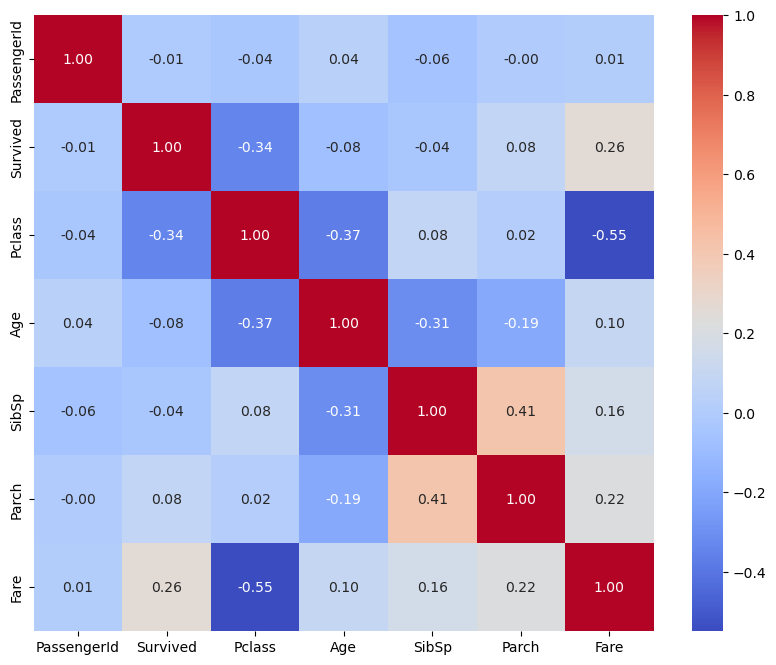

In [83]:
#Correlation matrix for train data
numeric_data = train_data.copy()

non_numeric_columns = numeric_data.select_dtypes(include=['object']).columns
numeric_data = numeric_data.drop(columns=non_numeric_columns)

correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

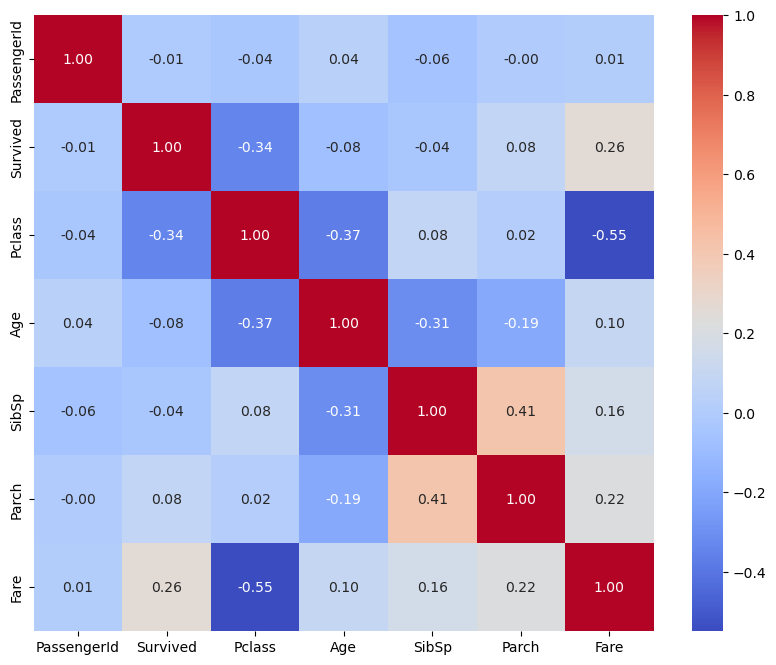

In [84]:
#Correlation matrix for test data
numeric_data = train_data.copy()

non_numeric_columns = numeric_data.select_dtypes(include=['object']).columns
numeric_data = numeric_data.drop(columns=non_numeric_columns)

correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [85]:
# A majority of passengers belong to the 3rd class, followed by 1st and 2nd classes.
# Most passengers traveled alone
# Fares are highly right-skewed, with most passengers paying low fares
# Survivors have paid higher fares compared to non-survivors.

In [86]:
# A strong negative correlation exists between Fare and Pclass
# Higher class passengers generally paid higher fares.
# No feature has strong linear relationship with Survived

# 2.Data Preprocessing:

In [87]:
#a. Handle missing values 
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [88]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [89]:
#Drop column from both dataset beacuse there is more values are null
train_data.drop(["Cabin"],inplace=True,axis = 1)
test_data.drop(["Cabin"],inplace=True,axis = 1)

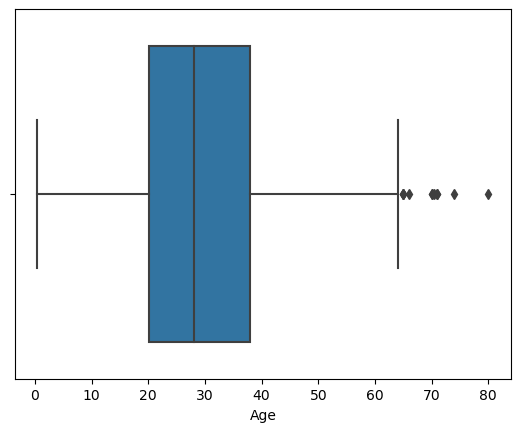

In [90]:
sns.boxplot(x = train_data['Age'])
plt.show()

In [91]:
#Outliers present in age column there for replace with median
numerical_cols_with_missing = ['Age']
for col in numerical_cols_with_missing:
    train_data[col].fillna(train_data[col].median(), inplace=True)

#Replacing by mode because its categorical variable
numerical_cols_with_missing = ['Embarked']
for col in numerical_cols_with_missing:
    train_data[col].fillna(train_data[col].mode().iloc[0], inplace=True)

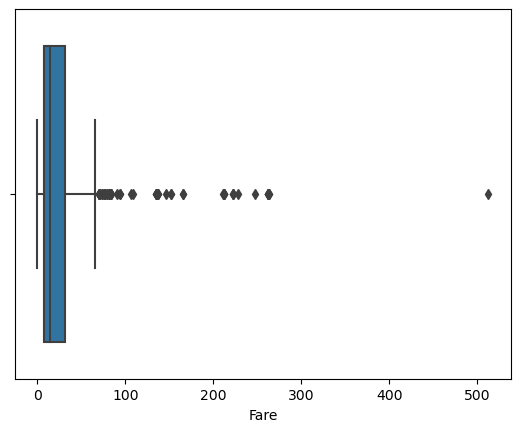

In [92]:
sns.boxplot(x = test_data['Fare'])
plt.show()

In [93]:
numerical_cols_with_missing = ['Age']
for col in numerical_cols_with_missing:
    test_data[col].fillna(test_data[col].median(), inplace=True)

numerical_cols_with_missing = ['Fare']
for col in numerical_cols_with_missing:
    test_data[col].fillna(test_data[col].median(), inplace=True)

In [94]:
#b. Encode categorical variables.
#there is Same values for test data
train_data['Sex'] = train_data['Sex'].map({'male': 1, 'female': 0})
train_data['Embarked'] = train_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [95]:
test_data['Sex'] = test_data['Sex'].map({'male': 1, 'female': 0})
test_data['Embarked'] = test_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [96]:
#3. Model Building:
#a. Build a logistic regression model 

In [97]:
# remove string columns
num_train_data = train_data.drop(columns=['Name', 'Ticket'])

In [98]:
X_train = num_train_data.drop(columns=['Survived'])
y_train = num_train_data['Survived']

In [99]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [100]:
# b. Train the model using the training data.
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200)

# 4.Model Evaluation:

In [101]:
#a. Evaluate the performance of the model 
#drop categorical column not use in mode prediction
num_test_data = test_data.drop(columns=['Name', 'Ticket'])

X_test_scaled = scaler.transform(num_test_data)

In [102]:
y_pred = log_reg.predict(X_test_scaled)

In [103]:
# we cannot evaluate the performance of the model on the testing data 
# because there is no Servived column present in test_data 
# after predicting y hat value there is no y value to compare them

In [104]:
# We can go for train_data calulate y hat value and compare them with y values

In [105]:
# Splitting the data into training and testing sets
X = train_data[['Pclass', 'Sex', 'Age', 'Fare']]
y = train_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# a. Evaluate the model
y_pred1 = log_reg.predict(X_test_scaled)

In [106]:
accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)
roc_auc = roc_auc_score(y_test, y_pred1)

In [107]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')

Accuracy: 0.79
Precision: 0.77
Recall: 0.72
F1 Score: 0.74
ROC AUC Score: 0.78


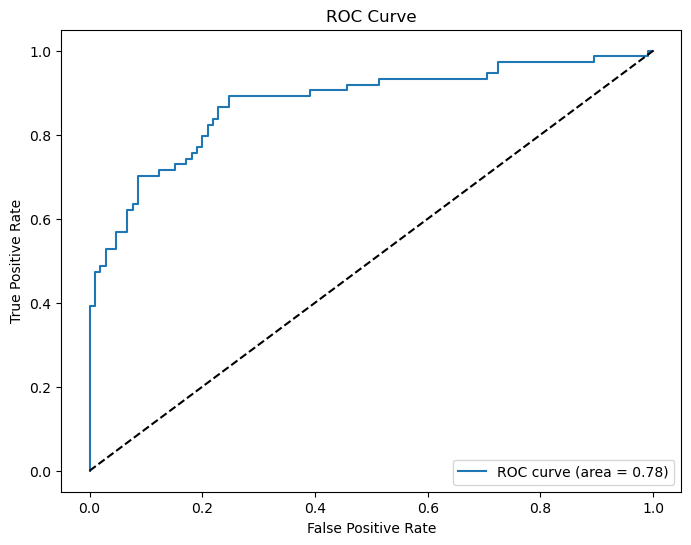

In [108]:
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [109]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,0


In [110]:
#For index 0 it predict not survived and the original answer also not survived
input_data1 = pd.DataFrame({
    'Pclass': [3],
    'Sex': [1],  
    'Age': [22],
    'Fare': [7.25]
})
input_data_scaled1 = scaler.transform(input_data1)
# Make a prediction using the trained model
prediction = log_reg.predict(input_data_scaled1)
probability = log_reg.predict_proba(input_data_scaled1)
print(f"Prediction: {'Survived' if prediction[0] == 1 else 'Not Survived'}")
print(f"Prediction Probabilities (Not Survived, Survived): {probability[0]}")

Prediction: Not Survived
Prediction Probabilities (Not Survived, Survived): [0.88875018 0.11124982]


In [111]:
# For index 1 it predict survived and the original answer also survived
input_data1 = pd.DataFrame({
    'Pclass': [1],
    'Sex': [0],  
    'Age': [38],
    'Fare': [71]
})
input_data_scaled1 = scaler.transform(input_data1)
# Make a prediction using the trained model
prediction = log_reg.predict(input_data_scaled1)
probability = log_reg.predict_proba(input_data_scaled1)
print(f"Prediction: {'Survived' if prediction[0] == 1 else 'Not Survived'}")
print(f"Prediction Probabilities (Not Survived, Survived): {probability[0]}")

Prediction: Survived
Prediction Probabilities (Not Survived, Survived): [0.10282179 0.89717821]


# 5.Interpretation:

In [112]:
#a. Interpret the coefficients of the logistic regression model.
coefficients = pd.DataFrame(log_reg.coef_[0], X.columns, columns=['Coefficient'])
print(coefficients)

        Coefficient
Pclass    -0.836520
Sex       -1.210141
Age       -0.326383
Fare       0.055713


In [ ]:
#b. Discuss the significance of features 
#Pclass : negative coefficient means lower classes have a lower probability of survival compared to those in higher classes
#Sex : negative coefficient for Sex indicates that being male is associated with a lower probability of survival
#Age : older passengers have a lower probability of survival
#Fare : who paid a higher fare had a higher probability of survival
#PassengerId : does not contain meaningful information related to survival probability

In [118]:
import pickle

In [119]:
filename = 'survival_prediction_model.sav'
pickle.dump(log_reg, open(filename, 'wb'))

In [128]:
numerical_columns = ['Pclass', 'Sex', 'Age', 'Fare']
train_data_numerical = train_data[numerical_columns]

In [129]:
scaled_numerical_data = scaler.fit_transform(train_data_numerical)

In [130]:
scaled_numerical_data_df = pd.DataFrame(scaled_numerical_data, columns=numerical_columns)

In [131]:
train_data_non_numeric = train_data.drop(columns=numerical_columns)  # Drop numeric columns to keep non-numeric ones
final_train_data = pd.concat([train_data_non_numeric, scaled_numerical_data_df], axis=1)

In [132]:
pickle.dump(scaler, open('scaler.sav', 'wb'))